In [164]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
import basicfunc as bbb

importlib.reload(bbb)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\imaging\\basicfunc.py'>

In [165]:
D1 = uproot.open('data_imaging\\group23_22Na_D1_10min_definitivo\\RAW\\DataR_CH0@DT5720B_781_group23_22Na_D1_10min_definitivo.root')
D2 = uproot.open('data_imaging\\group23_22Na_D2_10min_definitivo_sicuri\\RAW\\DataR_CH1@DT5720B_781_group23_22Na_D2_10min_definitivo_sicuri.root')
D3 = uproot.open('data_imaging\\group23_22Na_D3_10min_def\\RAW\\DataR_CH2@DT5720B_781_group23_22Na_D3_10min_def.root')
D4 = uproot.open('data_imaging\\group23_22Na_D4_10min_def\\RAW\\DataR_CH3@DT5720B_781_group23_22Na_D4_10min_def.root')
D5 = uproot.open('data_imaging\\group23_22Na_D5_10min_def\\RAW\\DataR_CH0@DT5720B_467_group23_22Na_D5_10min_def.root')
D6 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH1@DT5720B_467_group23_22Na_D6_10min_def.root')
D7 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH2@DT5720B_467_group23_22Na_D6_10min_def.root')
D8 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH3@DT5720B_467_group23_22Na_D6_10min_def.root')

In [166]:
d1 = np.asarray(D1['Data_R;1']['Energy'].array())
d2 = np.asarray(D2['Data_R;2']['Energy'].array())
d3 = np.asarray(D3['Data_R;2']['Energy'].array())
d4 = np.asarray(D4['Data_R;2']['Energy'].array())
d5 = np.asarray(D5['Data_R;3']['Energy'].array())
d6 = np.asarray(D6['Data_R;3']['Energy'].array())
d7 = np.asarray(D7['Data_R;2']['Energy'].array())
d8 = np.asarray(D8['Data_R;2']['Energy'].array())


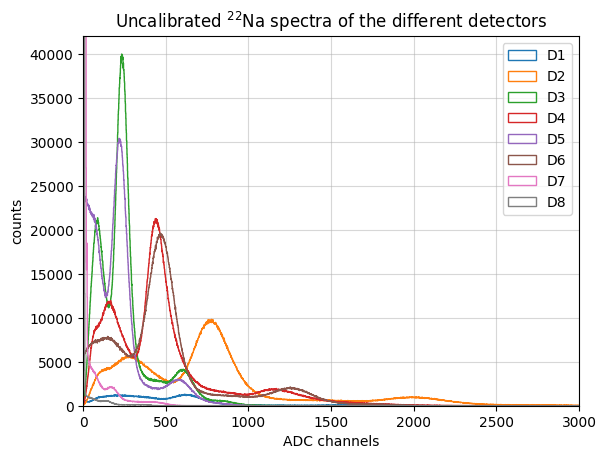

In [167]:
plt.hist(d1, bins=int(d1.max()), histtype='step', label='D1')
plt.hist(d2, bins=int(d2.max()), histtype='step', label='D2')
plt.hist(d3, bins=int(d3.max()), histtype='step', label='D3')
plt.hist(d4, bins=int(d4.max()), histtype='step', label='D4')
plt.hist(d5, bins=int(d5.max()), histtype='step', label='D5')
plt.hist(d6, bins=int(d6.max()), histtype='step', label='D6')
plt.hist(d7, bins=int(d7.max()), histtype='step', label='D7')
plt.hist(d8, bins=int(d8.max()), histtype='step', label='D8')
plt.title(r'Uncalibrated $^{22}$Na spectra of the different detectors')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.ylim(0, 42000)
plt.xlim(0, 3000)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [178]:
print('D1 \nCompton')
# d1normCom = bbb.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the of $^{22}$Na', xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Primo picco:')
d1norm1 = bbb.normal(d1, xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco:')
d1norm2 = bbb.normal(d1, xmin=1400, xmax=2000, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D2 \nPrimo picco')
d2norm1 = bbb.normal(d2, xmin=600, xmax=950, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d2norm2 = bbb.normal(d2,  xmin=1750, xmax=2300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D3 \nPrimo Picco')
d3norm1 = bbb.normal(d3, xmin=170, xmax=300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d3norm2 = bbb.normal(d3, xmin=520, xmax=700, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D4 \nPrimo picco')
d4norm1 = bbb.normal(d4, xmin=320, xmax=570, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d4norm2 = bbb.normal(d4, xmin=1000, xmax=1350, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d5norm1 = bbb.normal(d5, xmin=150, xmax=300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d5norm2 = bbb.normal(d5, xmin=480, xmax=680, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d6norm1 = bbb.normal(d6, xmin=350, xmax=580, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d6norm2 = bbb.normal(d6, xmin=1100, xmax=1450, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d7norm1 = bbb.normal(d7, xmin=140, xmax=200, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d7norm2 = bbb.normal(d7, xmin=350, xmax=500, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d8norm1 = bbb.normal(d8, xmin=100, xmax=200, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d8norm2 = bbb.normal(d8, xmin=250, xmax=400, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')

D1 
Compton
Primo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 338109.3599060629 ± 1905.151088414951
Media = 616.0207899885756 ± 0.4835257283466749
Sigma = 110.79018891855962 ± 0.8060963475372384
Chi-quadro = 357.134863942679
Chi-quadro ridotto = 1.445890137419753
Integrale dell'istogramma nel range [394.44041215145637, 837.6011678256949] = 371889 ± 609
Secondo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 43765.79421203449 ± 299.57369506237745
Media = 1624.6067070564497 ± 1.2564103943678144
Sigma = 168.99294309209205 ± 1.4516617266924874
Chi-quadro = 662.171225457022
Chi-quadro ridotto = 1.1091645317538057
Integrale dell'istogramma nel range [1286.6208208722655, 1962.592593240634] = 44017 ± 209
______________________________________________________________________________________________________________
D2 
Primo picco
Parametri ottimizzati:
-----------------------------------------------
Ampiezza =

In [169]:
y_calib = np.array([511, 1275]) #KeV
#__________________________________________________________________________________________________________
xD1 = np.array([d1norm1[0][1], d1norm2[0][1]])
sxD1 = np.array([d1norm1[1][1], d1norm2[1][1],])
calibrazioneD1 = bbb.linear_regression(xD1, y_calib, sx=sxD1, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D1', plot='no')
print('__________________________________________________________________________________________________________')
xD2 = np.array([d2norm1[0][1], d2norm2[0][1]])
sxD2 = np.array([d2norm1[1][1], d2norm2[1][1],])
calibrazioneD2 = bbb.linear_regression(xD2, y_calib, sx=sxD2, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D2', plot='no')
print('__________________________________________________________________________________________________________')
xD3 = np.array([d3norm1[0][1], d3norm2[0][1]])
sxD3 = np.array([d3norm1[1][1], d3norm2[1][1],])
calibrazioneD3 = bbb.linear_regression(xD3, y_calib, sx=sxD3, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D3', plot='no')
print('__________________________________________________________________________________________________________')
xD4 = np.array([d4norm1[0][1], d4norm2[0][1]])
sxD4 = np.array([d4norm1[1][1], d4norm2[1][1],])
calibrazioneD4 = bbb.linear_regression(xD4, y_calib, sx=sxD4, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D4', plot='no')
print('__________________________________________________________________________________________________________')
xD5 = np.array([d5norm1[0][1], d5norm2[0][1]])
sxD5 = np.array([d5norm1[1][1], d5norm2[1][1],])
calibrazioneD5 = bbb.linear_regression(xD5, y_calib, sx=sxD5, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D5', plot='no')
print('__________________________________________________________________________________________________________')
xD6 = np.array([d6norm1[0][1], d6norm2[0][1]])
sxD6 = np.array([d6norm1[1][1], d6norm2[1][1],])
calibrazioneD6 = bbb.linear_regression(xD6, y_calib, sx=sxD6, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D6', plot='no')
print('__________________________________________________________________________________________________________')
xD7 = np.array([d7norm1[0][1], d7norm2[0][1]])
sxD7 = np.array([d7norm1[1][1], d7norm2[1][1],])
calibrazioneD7 = bbb.linear_regression(xD7, y_calib, sx=sxD7, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D7', plot='no')
print('__________________________________________________________________________________________________________')
xD8 = np.array([d8norm1[0][1], d8norm2[0][1]])
sxD8 = np.array([d8norm1[1][1], d8norm2[1][1],])
calibrazioneD8 = bbb.linear_regression(xD8, y_calib, sx=sxD8, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D8', plot='no')


Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.7574962004433666 ± 0.0015822020251721697
Intercetta (q) = 44.36659218904066 ± 1.0350907569265246
Chi-squared= 1.5369234634999633e-18
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.631641346893913 ± 0.0003609030711236539
Intercetta (q) = 22.201632035585305 ± 0.28713120187355545
Chi-squared= 5.705489716034212e-17
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 2.121317450816527 ± 0.00027138444246053875
Intercetta (q) = 11.822421778864964 ± 0.06852605098058366
Chi-squared= 3.642388148156892e-17
Non ha senso calcolare il chi2 r

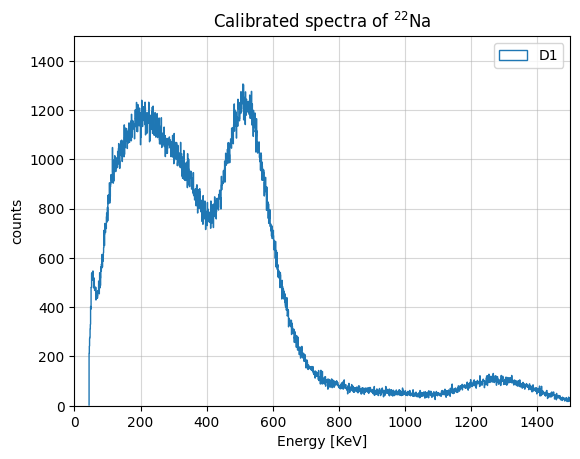

In [170]:
d1_calib = d1*calibrazioneD1[0]+calibrazioneD1[1]
plt.hist(d1_calib, bins=int(d1.max()), histtype='step', label='D1')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 1500)
plt.xlim(0, 1500)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# samples

In [171]:
L=250 #mm
h = 15 #mm
g = 5 #mm
s = np.array([3*g+5/2*h, 2*g+3/2*h, g+1/2*h, -1/2*h, -g-3/2*h, -2*g-5/2*h, -3*g-7/2*h])
theta_max = []
theta_min = []
for i in range(6):
    theta_max.append(np.arctan(s[i]*i+h/L))
    theta_min.append(np.arctan(s[i]*i/L))
theta_max = np.array(theta_max)
theta_min = np.array(theta_min)
x0 = 5 #mm
x_eff = x0/2*(theta_max-theta_min)*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))

## HOME

In [172]:
home_d1 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
home_d2 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
home_d3 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
home_d4 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
home_d5 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
home_d6 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
home_d7 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
home_d8 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')

In [173]:
hm_d1 = np.asarray(home_d1['Data_R;1']['Energy'].array())
hm_d1_calib = hm_d1 * calibrazioneD1[0] + calibrazioneD1[1]
hm_d1_def = hm_d1_calib[hm_d1_calib != 0]

hm_d2 = np.asarray(home_d2['Data_R;1']['Energy'].array())
hm_d2_calib = hm_d2 * calibrazioneD2[0] + calibrazioneD2[1]
hm_d2_def = hm_d2_calib[hm_d2_calib != 0]

hm_d3 = np.asarray(home_d3['Data_R;1']['Energy'].array())
hm_d3_calib = hm_d3 * calibrazioneD3[0] + calibrazioneD3[1]
hm_d3_def = hm_d3_calib[hm_d3_calib != 0]

hm_d4 = np.asarray(home_d4['Data_R;1']['Energy'].array())
hm_d4_calib = hm_d4 * calibrazioneD4[0] + calibrazioneD4[1]
hm_d4_def = hm_d4_calib[hm_d4_calib != 0]

hm_d5 = np.asarray(home_d5['Data_R;1']['Energy'].array())
hm_d5_calib = hm_d5 * calibrazioneD5[0] + calibrazioneD5[1]
hm_d5_def = hm_d5_calib[hm_d5_calib != 0]

hm_d6 = np.asarray(home_d6['Data_R;1']['Energy'].array())
hm_d6_calib = hm_d6 * calibrazioneD6[0] + calibrazioneD6[1]
hm_d6_def = hm_d6_calib[hm_d6_calib != 0]

hm_d7 = np.asarray(home_d7['Data_R;1']['Energy'].array())
hm_d7_calib = hm_d7 * calibrazioneD7[0] + calibrazioneD7[1]
hm_d7_def = hm_d7_calib[hm_d7_calib != 0]

hm_d8 = np.asarray(home_d8['Data_R;1']['Energy'].array())
hm_d8_calib = hm_d8 * calibrazioneD8[0] + calibrazioneD8[1]
hm_d8_def = hm_d8_calib[hm_d8_calib != 0]


hm_def = [hm_d1_def, hm_d2_def, hm_d3_def, hm_d4_def, hm_d5_def, hm_d6_def, hm_d7_def, hm_d8_def]



## PIOMBO

In [174]:
piombo_d1 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d2 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d3 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d4 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d5 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d6 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d7 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d8 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')

In [175]:
pb_d1 = np.asarray(piombo_d1['Data_R;1']['Energy'].array())
pb_d1_calib = pb_d1*calibrazioneD1[0]+calibrazioneD1[1]
pb_d1_def = pb_d1_calib[pb_d1_calib != 0]

pb_d2 = np.asarray(piombo_d2['Data_R;1']['Energy'].array())
pb_d2_calib = pb_d2*calibrazioneD2[0]+calibrazioneD2[1]
pb_d2_def = pb_d2_calib[pb_d2_calib != 0]

pb_d3 = np.asarray(piombo_d3['Data_R;1']['Energy'].array())
pb_d3_calib = pb_d3 * calibrazioneD3[0] + calibrazioneD3[1]
pb_d3_def = pb_d3_calib[pb_d3_calib != 0]

pb_d4 = np.asarray(piombo_d4['Data_R;1']['Energy'].array())
pb_d4_calib = pb_d4 * calibrazioneD4[0] + calibrazioneD4[1]
pb_d4_def = pb_d4_calib[pb_d4_calib != 0]

pb_d5 = np.asarray(piombo_d5['Data_R;1']['Energy'].array())
pb_d5_calib = pb_d5 * calibrazioneD5[0] + calibrazioneD5[1]
pb_d5_def = pb_d5_calib[pb_d5_calib != 0]

pb_d6 = np.asarray(piombo_d6['Data_R;1']['Energy'].array())
pb_d6_calib = pb_d6 * calibrazioneD6[0] + calibrazioneD6[1]
pb_d6_def = pb_d6_calib[pb_d6_calib != 0]

pb_d7 = np.asarray(piombo_d7['Data_R;1']['Energy'].array())
pb_d7_calib = pb_d7 * calibrazioneD7[0] + calibrazioneD7[1]
pb_d7_def = pb_d7_calib[pb_d7_calib != 0]

pb_d8 = np.asarray(piombo_d8['Data_R;1']['Energy'].array())
pb_d8_calib = pb_d8 * calibrazioneD8[0] + calibrazioneD8[1]
pb_d8_def = pb_d8_calib[pb_d8_calib != 0]

pb_def = [pb_d1_def, pb_d2_def, pb_d3_def, pb_d4_def, pb_d5_def, pb_d6_def, pb_d7_def, pb_d8_def]

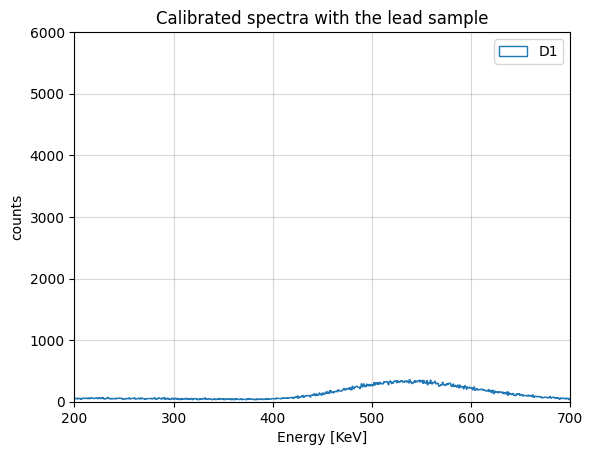

In [180]:
plt.hist(pb_d1_def, bins=int(pb_d1.max()), histtype='step', label='D1')
# plt.hist(pb_d2_def, bins=int(pb_d2.max()), histtype='step', label='D2')
# plt.hist(pb_d3_def, bins=int(pb_d3.max()), histtype='step', label='D3')
# plt.hist(pb_d4_def, bins=int(pb_d4.max()), histtype='step', label='D4')
# plt.hist(pb_d5_def, bins=int(pb_d5.max()), histtype='step', label='D5')
# plt.hist(pb_d6_def, bins=int(pb_d6.max()), histtype='step', label='D6')
# plt.hist(pb_d7_def, bins=int(pb_d7.max()), histtype='step', label='D7')
# plt.hist(pb_d8_def, bins=int(pb_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the lead sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 6000)
plt.xlim(200, 700)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 444095.9302740095 ± 5676.234021789962
Media = 540.9960557597757 ± 0.9936552297641766
Sigma = 69.9251455672574 ± 1.094074453663564
Chi-quadro = 396.5430844999844
Chi-quadro ridotto = 9.221932197674056
Integrale dell'istogramma nel range [401.1457646252609, 680.8463468942905] = 72346 ± 268


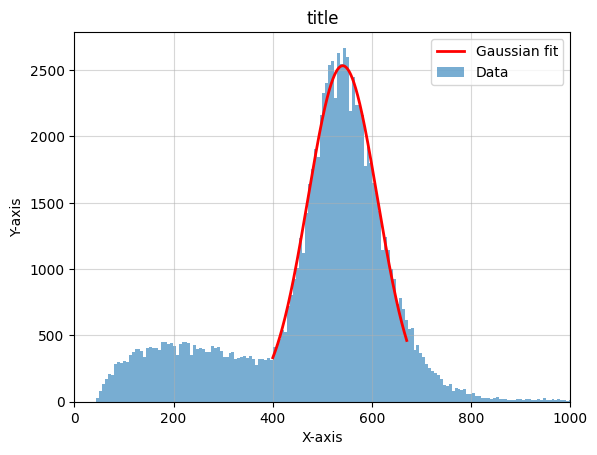

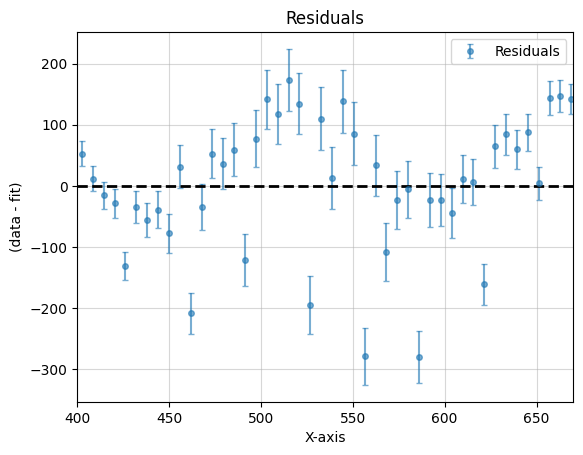

In [187]:
fit_pb_d1 = bbb.normal(pb_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(pb_d1_def.max()/6), n=2, plot='yes')

In [ ]:
mu_piombo = []
for i in range(len(pb_def)):
    mu_piombo.append(-np.log(pb_def[i]/hm_def[i])/x_eff[i])

mu_piombo

IndexError: index 6 is out of bounds for axis 0 with size 6